Name: Mansi Joshi
StudentId: 300317856
CSIS3290 Project1 Part 2

1. Read the data file into a DataFrame.
2. Please, select only the following columns of data to use in your analysis: Revenue($m), Profits($m), Assets($m), Market Value($m), Employees, Alexa Rank, Semrush Rank, Organic Keywords, Organic Traffic, Adwords Keywords, and Adwords Traffic.
3. Drop all rows with missing values from the data.
4. Process the data into numeric form suitable for analysis.
5. After you process the data into numeric form, check again if there are any missing values. If so, drop rows with missing values.
6. Compute “Average Rank” column of data by taking the average of the sum of Alexa Rank and Semrush Rank.

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Lasso
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import metrics

df = pd.read_csv("df_merged.csv",sep=',',index_col=0)
#print(df)

cols = ["Revenue($m)","Profits($m)","Assets($m)","Market Value($m)","Employees","Alexa Rank","Semrush Rank","Organic Keywords",
       "Organic Traffic","Adwords Keywords","Adwords Traffic"]
#df[cols] = df[cols].replace({},regex=True)

df_final = df[cols]

#drop rows with missing values
df_final = df_final.dropna()

df_final[cols] = df_final[cols].apply(pd.to_numeric, errors = "coerce")

#check for missing values again
#print(df_final.isnull().sum())

df_final = df_final.dropna()
#print(df.info())

df_final["Average Rank"] = df_final[["Alexa Rank", "Semrush Rank"]].mean(axis=1)
#print(df_final)
df_final.describe()

,Revenue($m),Profits($m),Assets($m),Market Value($m),Employees,Alexa Rank,Semrush Rank,Organic Keywords,Organic Traffic,Adwords Keywords,Adwords Traffic,Average Rank
count,295.000000,295.000000,2.950000e+02,2.950000e+02,2.950000e+02,2.950000e+02,2.950000e+02,2.950000e+02,2.950000e+02,295.000000,2.950000e+02,2.950000e+02
mean,21210.109492,1716.508475,5.584942e+04,3.713871e+04,4.276106e+04,7.958973e+05,1.065001e+05,3.008288e+06,1.196100e+07,5504.681356,2.298527e+05,4.511987e+05
std,49685.652797,5424.619312,2.568714e+05,1.272633e+05,1.466778e+05,5.844373e+06,2.786250e+05,2.877718e+07,7.567902e+07,31586.412286,8.626262e+05,2.950935e+06
min,1999.000000,-8506.000000,9.053000e+02,2.200000e+00,5.100000e+01,1.000000e+00,3.000000e+00,5.000000e+01,9.700000e+01,0.000000,0.000000e+00,2.500000e+00
25%,3048.500000,126.000000,4.308050e+03,2.265700e+03,5.944500e+03,1.995550e+04,4.447500e+03,2.934500e+03,1.066800e+04,0.000000,0.000000e+00,1.290525e+04
50%,5681.100000,398.500000,9.476000e+03,7.585500e+03,1.172900e+04,1.509920e+05,3.545500e+04,1.339100e+04,4.547900e+04,0.000000,0.000000e+00,9.707400e+04
75%,14233.650000,1214.050000,2.952150e+04,2.075340e+04,2.900000e+04,5.623795e+05,1.151445e+05,1.111670e+05,4.463970e+05,495.500000,8.628500e+03,3.359668e+05
max,523964.000000,55256.000000,3.503319e+06,1.199550e+06,2.200000e+06,1.000000e+08,3.040985e+06,4.728967e+08,9.504168e+08,497847.000000,7.672885e+06,5.033368e+07


7. Explore the data by examining correlations among variables (please use seaborn heatmap), scatter plots, and histograms. Note that our target dependent (outcome) variables are Revenue and Profits. Focus on scatter plots between those outcome variables and particularly the following search-related variables: Organic Keywords, Organic Traffic, Adwords Keywords, and Adwords Traffic; and on the histograms of these 6 variables. Note: for the heatmap, control the size of the chart using matplotlib chart size options (hint: refer to heatmap in the udemy class example.)

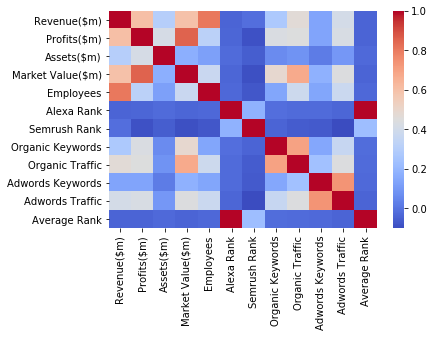

In [303]:
#get variable correlations 
corr = df_final.corr()

#print the correlations
#print(corr)

#Graph of correlation using seaborn
import seaborn as sns
#use heatmap, import seaborn as sns
sns.heatmap(corr, annot=False,cmap='coolwarm',fmt='.5g')

<function matplotlib.pyplot.show(*args, **kw)>

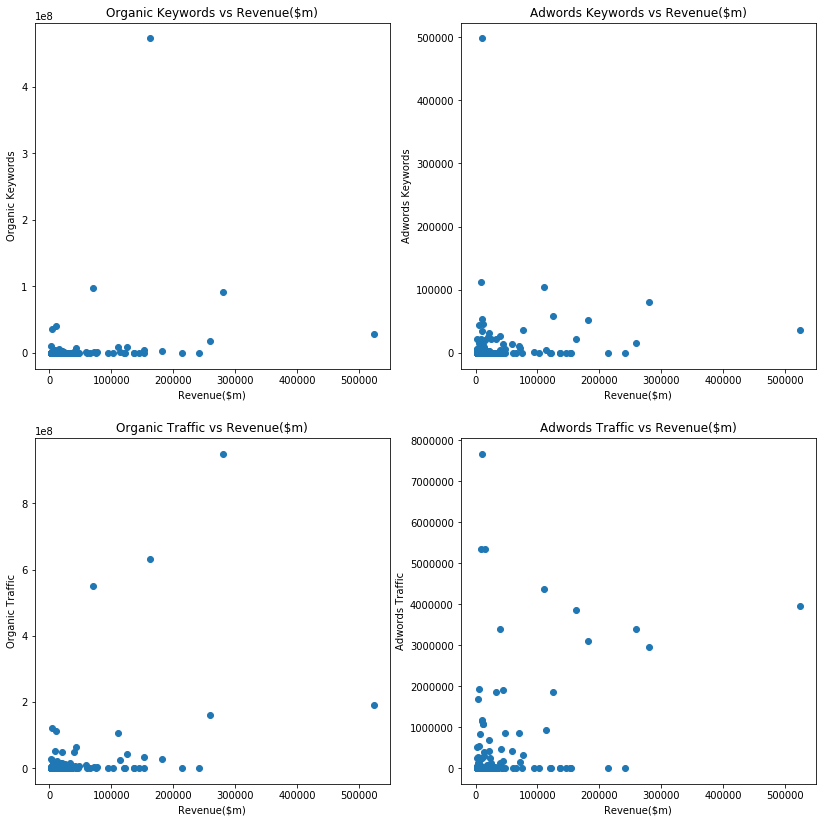

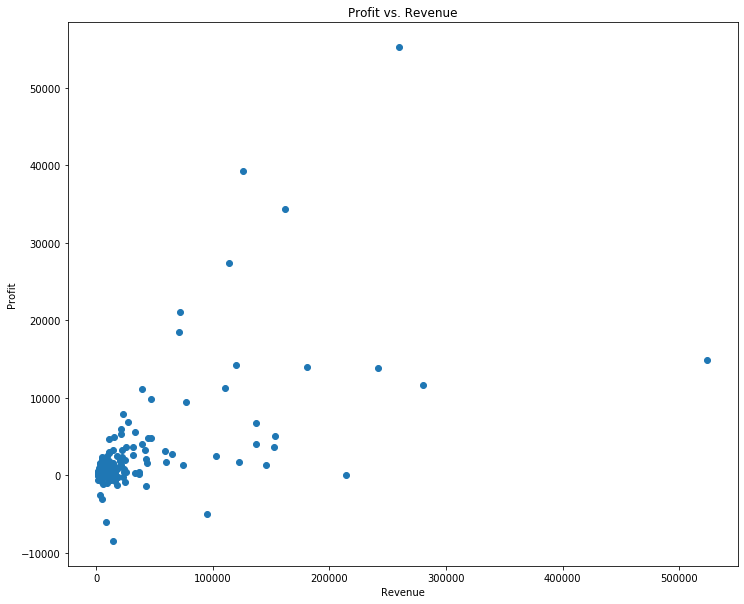

In [304]:
#scatter plots
#combine  2 charts into one display area
#specify the size of plot area

plt.figure(figsize=(14,14))
plt.scatter('Revenue($m)','Profits($m)', data=df_final)
plt.title('Profit vs. Revenue')
plt.xlabel('Revenue')
plt.ylabel('Profit')

#combine  4 charts into one display area
#specify the size of plot area
#matrix (2 side-by-side charts)
plt.subplot(221) #first subplot
plt.scatter('Revenue($m)','Organic Keywords', data=df_final)
plt.title('Organic Keywords vs Revenue($m)')
plt.xlabel('Revenue($m)')
plt.ylabel('Organic Keywords')

plt.subplot(222) #second subplot
plt.scatter('Revenue($m)','Adwords Keywords', data=df_final)
plt.title('Adwords Keywords vs Revenue($m)')
plt.xlabel('Revenue($m)')
plt.ylabel('Adwords Keywords')

plt.subplot(223) #third subplot
plt.scatter('Revenue($m)','Organic Traffic', data=df_final)
plt.title('Organic Traffic vs Revenue($m)')
plt.xlabel('Revenue($m)')
plt.ylabel('Organic Traffic')

plt.subplot(224) #Fourth subplot
plt.scatter('Revenue($m)','Adwords Traffic', data=df_final)
plt.title('Adwords Traffic vs Revenue($m)')
plt.xlabel('Revenue($m)')
plt.ylabel('Adwords Traffic')

plt.figure(figsize=(12,10))
plt.scatter('Revenue($m)','Profits($m)', data=df_final)
plt.title('Profit vs. Revenue')
plt.xlabel('Revenue')
plt.ylabel('Profit')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

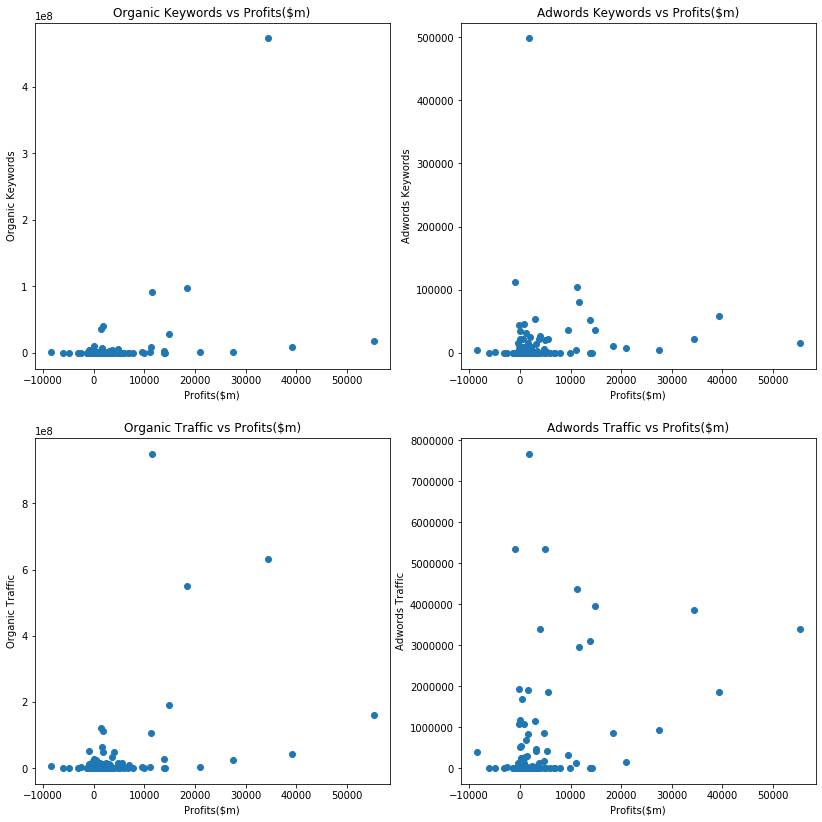

In [305]:
#combine  4 charts into one display area
#specify the size of plot area
#matrix (2 side-by-side charts)

plt.figure(figsize=(14,14))
plt.subplot(221) #first subplot
plt.scatter('Profits($m)','Organic Keywords', data=df_final)
plt.title('Organic Keywords vs Profits($m)')
plt.xlabel('Profits($m)')
plt.ylabel('Organic Keywords')

plt.subplot(222) #second subplot
plt.scatter('Profits($m)','Adwords Keywords', data=df_final)
plt.title('Adwords Keywords vs Profits($m)')
plt.xlabel('Profits($m)')
plt.ylabel('Adwords Keywords')

plt.subplot(223) #third subplot
plt.scatter('Profits($m)','Organic Traffic', data=df_final)
plt.title('Organic Traffic vs Profits($m)')
plt.xlabel('Profits($m)')
plt.ylabel('Organic Traffic')

plt.subplot(224) #Fourth subplot
plt.scatter('Profits($m)','Adwords Traffic', data=df_final)
plt.title('Adwords Traffic vs Profits($m)')
plt.xlabel('Profits($m)')
plt.ylabel('Adwords Traffic')

plt.show

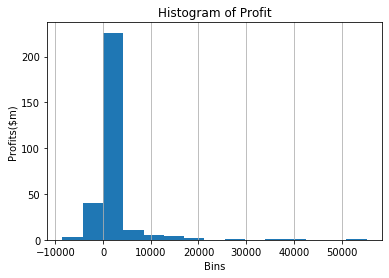

In [306]:
#histogram (column chart of frequencies) #CHECK, GENERATE HISTOGRAM AS PER INSTRUCTIONS IN THE PDF
df_final['Profits($m)'].plot.hist(grid=True, bins=15)
plt.title("Histogram of Profit")
plt.xlabel('Bins')
plt.ylabel('Profits($m)')
plt.grid(axis='y')


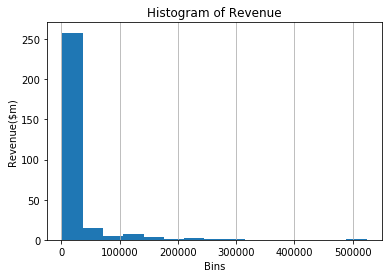

In [307]:
#histogram (column chart of frequencies)
df_final['Revenue($m)'].plot.hist(grid=True, bins=15)
plt.title("Histogram of Revenue")
plt.xlabel('Bins')
plt.ylabel('Revenue($m)')
plt.grid(axis='y')

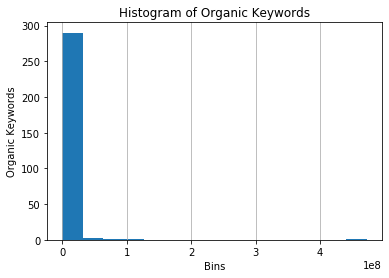

In [308]:
#histogram (column chart of frequencies)
df_final['Organic Keywords'].plot.hist(grid=True, bins=15)
plt.title("Histogram of Organic Keywords")
plt.xlabel('Bins')
plt.ylabel('Organic Keywords')
plt.grid(axis='y')

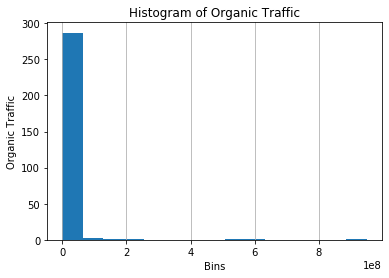

In [309]:
#histogram (column chart of frequencies)
df_final['Organic Traffic'].plot.hist(grid=True, bins=15)
plt.title("Histogram of Organic Traffic")
plt.xlabel('Bins')
plt.ylabel('Organic Traffic')
plt.grid(axis='y')

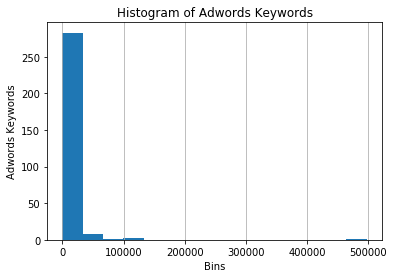

In [310]:
#histogram (column chart of frequencies)
df_final['Adwords Keywords'].plot.hist(grid=True, bins=15)
plt.title("Histogram of Adwords Keywords")
plt.xlabel('Bins')
plt.ylabel('Adwords Keywords')
plt.grid(axis='y')

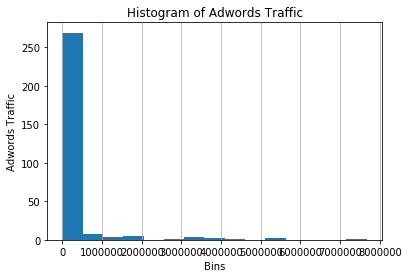

In [311]:
#histogram (column chart of frequencies)
df_final['Adwords Traffic'].plot.hist(grid=True, bins=15)
plt.title("Histogram of Adwords Traffic")
plt.xlabel('Bins')
plt.ylabel('Adwords Traffic')
plt.grid(axis='y')

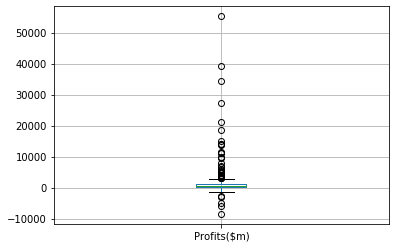

In [312]:
#box plot
boxplot = df_final.boxplot(column=['Profits($m)'])

8. Using a lambda function or other means, transform the data using min-max normalization based on the following formula:
Transformed data value = (x - min(x))/(max(x)-min(x))
*Used scalar method*
9. Using transformed data, estimate two explanatory models using the full scaled dataset (two models because we have 2 outcome variables: Revenue and Profits).
10. Split the data into training sample and testing sample, with 60% train and 40% test. Please use the "random_state" option to control the shuffling applied to the data before applying the split. Pass an integer value to this option for reproducible output across multiple function calls

In [313]:
# scaling
scale_df = df_final.copy() #Profits($m)
scale_df[['Assets($m)', 'Organic Traffic', 'Adwords Traffic']] = scaler.fit_transform(scale_df[['Assets($m)', 'Organic Traffic', 'Adwords Traffic']])

df1 = scale_df.drop(columns = ['Revenue($m)','Market Value($m)','Employees','Alexa Rank','Semrush Rank','Organic Keywords','Adwords Keywords', 'Average Rank'])
df2 = scale_df.drop(columns = ['Profits($m)','Market Value($m)','Employees','Alexa Rank','Semrush Rank','Organic Keywords','Adwords Keywords', 'Average Rank'])

In [314]:
# split sample data
#Profits
train1 , test1 = train_test_split(df1, test_size = 0.4, random_state = 42)
# create train data
x1_train = train1.drop('Profits($m)', axis=1)
y1_train = train1['Profits($m)']
# create test data
x1_test = test1.drop('Profits($m)', axis = 1)
y1_test = test1['Profits($m)']

# create x,y for profits
X1s = df1.drop('Profits($m)', axis=1)
Y1s = df1['Profits($m)']

In [315]:
#Revenue
train2 , test2 = train_test_split(df2, test_size = 0.4, random_state = 42)
# create train data
x2_train = train2.drop('Revenue($m)', axis=1)
y2_train = train2['Revenue($m)']
# create test data
x2_test = test2.drop('Revenue($m)', axis = 1)
y2_test = test2['Revenue($m)']

# create x,y for revenue
X2s = df2.drop('Revenue($m)', axis=1)
Y2s = df2['Revenue($m)']

11. Estimate OLS, Ridge and Lasso models using the train sample and assess their predictive performance using the test sample and RMSE statistic. Note: for Ridge and Lasso regressions, you will first need to determine the optimal regularization parameter (i.e., alpha) value to use). Again, you will need to estimate models using Revenue as the outcome variable and Profits as the outcome variable. Please use the same predictors as in 9) above.

OLS model

In [316]:
#Profits
X1cons = sm.add_constant(x1_train)
est1 = sm.OLS(y1_train, X1cons)
estFit1 = est1.fit()

print(estFit1.summary())

                            OLS Regression Results                            
Dep. Variable:            Profits($m)   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     20.53
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           1.99e-11
Time:                        17:44:21   Log-Likelihood:                -1758.0
No. Observations:                 177   AIC:                             3524.
Df Residuals:                     173   BIC:                             3537.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             778.6016    400.703     

In [317]:
#Revenue
X2cons = sm.add_constant(x2_train)
est2 = sm.OLS(y2_train, X2cons)
estFit2 = est2.fit()

print(estFit2.summary())

                            OLS Regression Results                            
Dep. Variable:            Revenue($m)   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     33.03
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           6.23e-17
Time:                        17:44:22   Log-Likelihood:                -2151.7
No. Observations:                 177   AIC:                             4311.
Df Residuals:                     173   BIC:                             4324.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.257e+04   3704.794     

In [318]:
#Making predictions
#Ordinary Least Squares

In [319]:
#Profits
lr1 = LinearRegression()
lr1.fit(x1_train,y1_train)

pred_test_lr1 = lr1.predict(x1_test)
print(np.sqrt(metrics.mean_squared_error(y1_test,pred_test_lr1)))

3034.631708958246


In [320]:
#Revenue
lr2 = LinearRegression()
lr2.fit(x2_train,y2_train)

pred_test_lr2 = lr2.predict(x2_test)
print(np.sqrt(metrics.mean_squared_error(y2_test,pred_test_lr2)))

33456.60126517767


Ridge Regression model

In [321]:
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 0.1, 1,2,5,10,20]
ridge_reg = linear_model.RidgeCV(alphas=alphas, store_cv_values=True)

In [322]:
#Profits
ridge_reg.fit(x1_train,y1_train)
cv_mse = np.mean(ridge_reg.cv_values_,axis=0)
print("alphas: %s" % alphas)
print("CV MSE: %s" % cv_mse)
print("Best alpha using built-in RidgeCV: %f" % ridge_reg.alpha_)

alphas: [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 20]
CV MSE: [2.21979023e+08 2.21979022e+08 2.21978955e+08 2.21303248e+08
 2.15373536e+08 1.68330196e+08 5.15693273e+07 2.87250509e+07
 2.94807813e+07 3.10935966e+07 3.22094128e+07 3.29980121e+07]
Best alpha using built-in RidgeCV: 1.000000


In [323]:
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 0.1, 1,2,5,10,20]
ridge_reg = linear_model.RidgeCV(alphas=alphas, store_cv_values=True)

#Revenue
ridge_reg.fit(x2_train,y2_train)
cv_mse = np.mean(ridge_reg.cv_values_,axis=0)
print("alphas: %s" % alphas)
print("CV MSE: %s" % cv_mse)
print("Best alpha using built-in RidgeCV: %f" % ridge_reg.alpha_)

alphas: [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 20]
CV MSE: [1.75594509e+10 1.75594508e+10 1.75594451e+10 1.75014167e+10
 1.69929994e+10 1.30155156e+10 3.82000589e+09 2.61150433e+09
 2.76987281e+09 2.99899947e+09 3.14394404e+09 3.24427108e+09]
Best alpha using built-in RidgeCV: 1.000000


In [324]:
#Making predictions

In [325]:
#Profits
alpha1 = ridge_reg.alpha_
ridge_reg1 = linear_model.Ridge(alpha=alpha1)
ridge_reg1.fit(x1_train, y1_train)
pred_y1 = ridge_reg1.predict(x1_test)
print(np.sqrt(metrics.mean_squared_error(y1_test,pred_y1)))

3434.855601080441


In [326]:
#Revenue
alpha2 = ridge_reg.alpha_
ridge_reg2 = linear_model.Ridge(alpha=alpha2)
ridge_reg2.fit(x2_train, y2_train)
pred_y2 = ridge_reg2.predict(x2_test)
print(np.sqrt(metrics.mean_squared_error(y2_test,pred_y2)))

28756.969314745525


Lasso Regression model

In [327]:
lasso = Lasso(max_iter = 5000)
parameters = {'alpha':[1,10,20,50,100]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error', cv=5)

In [328]:
#Profits
lasso_regressor.fit(x1_train,y1_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 100}
-36402928.64710232


In [329]:
#Revenue
lasso_regressor.fit(x2_train,y2_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 100}
-13324851922.785124


In [330]:
#Making predictions

In [331]:
#Profits
lasso1 = Lasso(alpha=0.001)
lasso1.fit(x1_train,y1_train)

pred_test_lasso1 = lasso1.predict(x1_test)
print(np.sqrt(metrics.mean_squared_error(y1_test,pred_test_lasso1)))

3034.63894324319


In [332]:
#Revenue
lasso2 = Lasso(alpha=0.001)
lasso2.fit(x2_train,y2_train)

pred_test_lasso2 = lasso2.predict(x2_test)
print(np.sqrt(metrics.mean_squared_error(y2_test,pred_test_lasso2)))

33456.59250530985


Make Predictions with the Best Model

In [333]:
#Profits

#df1_test.describe()
#Predict the expected profit for the following X's:
X1new = [[0.25, 0.15, 0.21]]
# make a prediction
y1new = lr1.predict(X1new)
# show the inputs and predicted outputs
print("X1=%s, Predicted Profit=%s" % (X1new, y1new))

X1=[[0.25, 0.15, 0.21]], Predicted Profit=[11563.56046845]


In [334]:
#Revenue

#df2_test.describe()
#Predict the expected revenue for the following X's:
X2new = [[0.25, 0.15, 0.21]]
# make a prediction
y2new = lr2.predict(X2new)
# show the inputs and predicted outputs
print("X2=%s, Predicted Revenue=%s" % (X2new, y2new))

X2=[[0.25, 0.15, 0.21]], Predicted Revenue=[126447.49003641]
